In [1]:
#!pip install numpy pandas matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Carregar os dados do arquivo seeds_dataset.txt
# Gerando nomes de colunas
column_names = [
    "Area", "Perimetro", "Compacidade", "Cumprimento",
    "Largura", "Coeficiente_asimetria", "Comprimento_sulco", "Clase"
]

# Ler o arquivo
file_path = "src/seeds_dataset.txt"
data = pd.read_csv(file_path, sep=r'\s+', header=None, names=column_names)

# Exibir as primeiras linhas do dataset para revisão inicial
print(data.head())


    Area  Perimetro  Compacidade  Cumprimento  Largura  Coeficiente_asimetria  \
0  15.26      14.84       0.8710        5.763    3.312                  2.221   
1  14.88      14.57       0.8811        5.554    3.333                  1.018   
2  14.29      14.09       0.9050        5.291    3.337                  2.699   
3  13.84      13.94       0.8955        5.324    3.379                  2.259   
4  16.14      14.99       0.9034        5.658    3.562                  1.355   

   Comprimento_sulco  Clase  
0              5.220      1  
1              4.956      1  
2              4.825      1  
3              4.805      1  
4              5.175      1  


In [5]:
#Resposta 1
#____________________________________________________________
print(data.describe())
# Cálculo de mediana e desvio padrão
mediana = data.median()
desvio = data.std()
print(f"Mediana:\n", mediana)
print(f"Desvio Padrão:\n", desvio)

             Area   Perimetro  Compacidade  Cumprimento     Largura  \
count  210.000000  210.000000   210.000000   210.000000  210.000000   
mean    14.847524   14.559286     0.870999     5.628533    3.258605   
std      2.909699    1.305959     0.023629     0.443063    0.377714   
min     10.590000   12.410000     0.808100     4.899000    2.630000   
25%     12.270000   13.450000     0.856900     5.262250    2.944000   
50%     14.355000   14.320000     0.873450     5.523500    3.237000   
75%     17.305000   15.715000     0.887775     5.979750    3.561750   
max     21.180000   17.250000     0.918300     6.675000    4.033000   

       Coeficiente_asimetria  Comprimento_sulco       Clase  
count             210.000000         210.000000  210.000000  
mean                3.700201           5.408071    2.000000  
std                 1.503557           0.491480    0.818448  
min                 0.765100           4.519000    1.000000  
25%                 2.561500           5.045000   

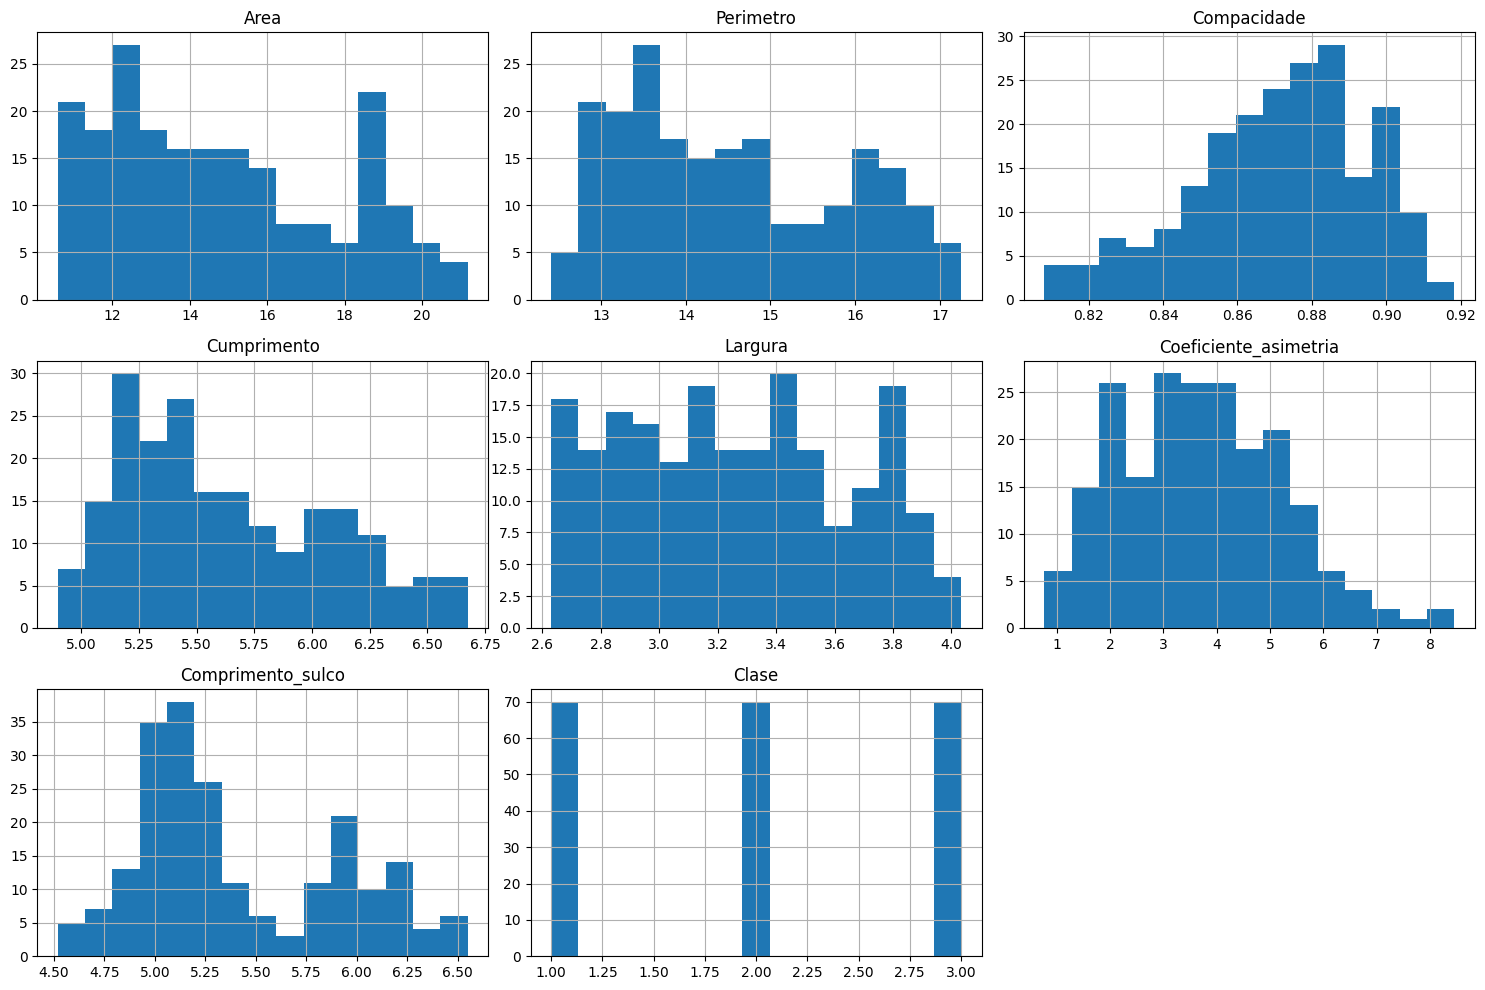

In [6]:
# Visualizar histogramas
data.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

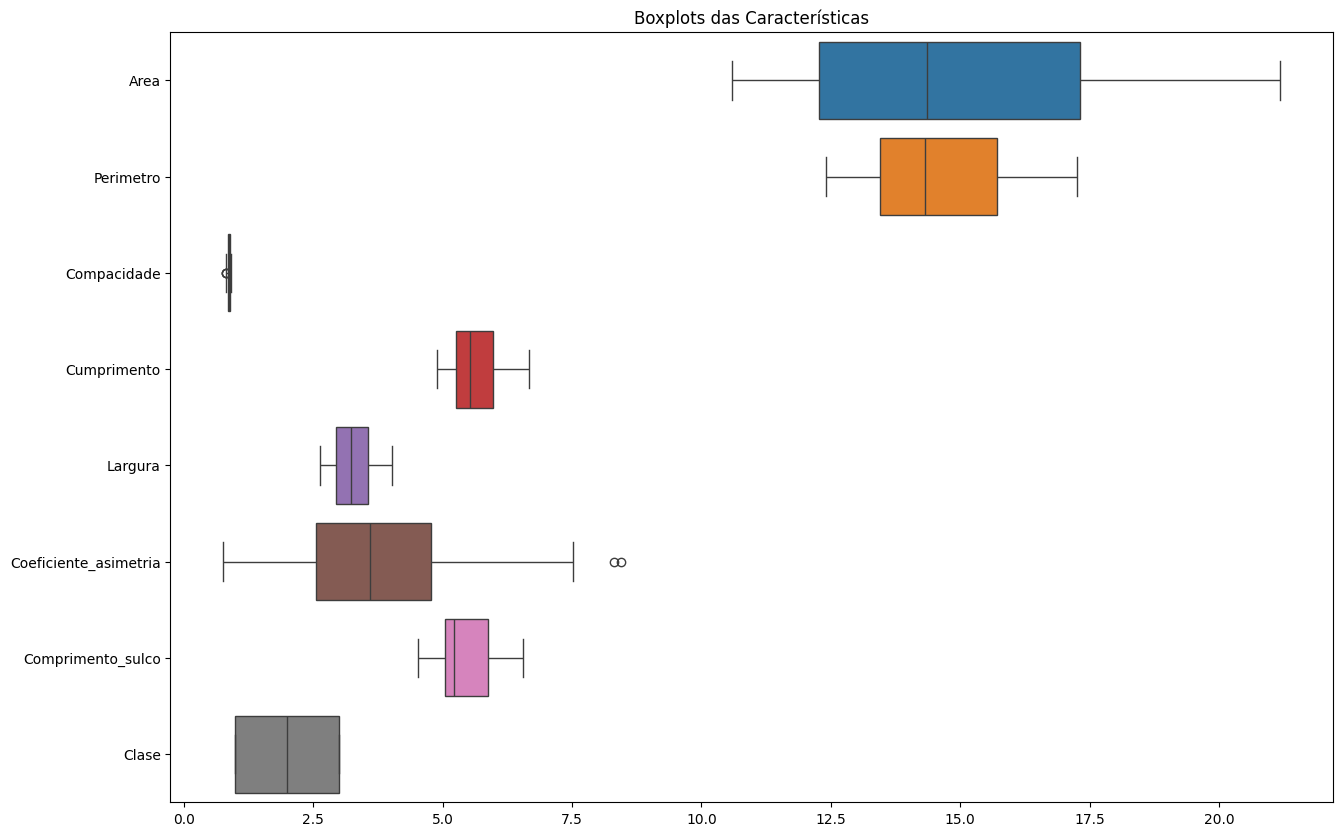

In [7]:
# Visualizar boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')
plt.title("Boxplots das Características")
plt.show()

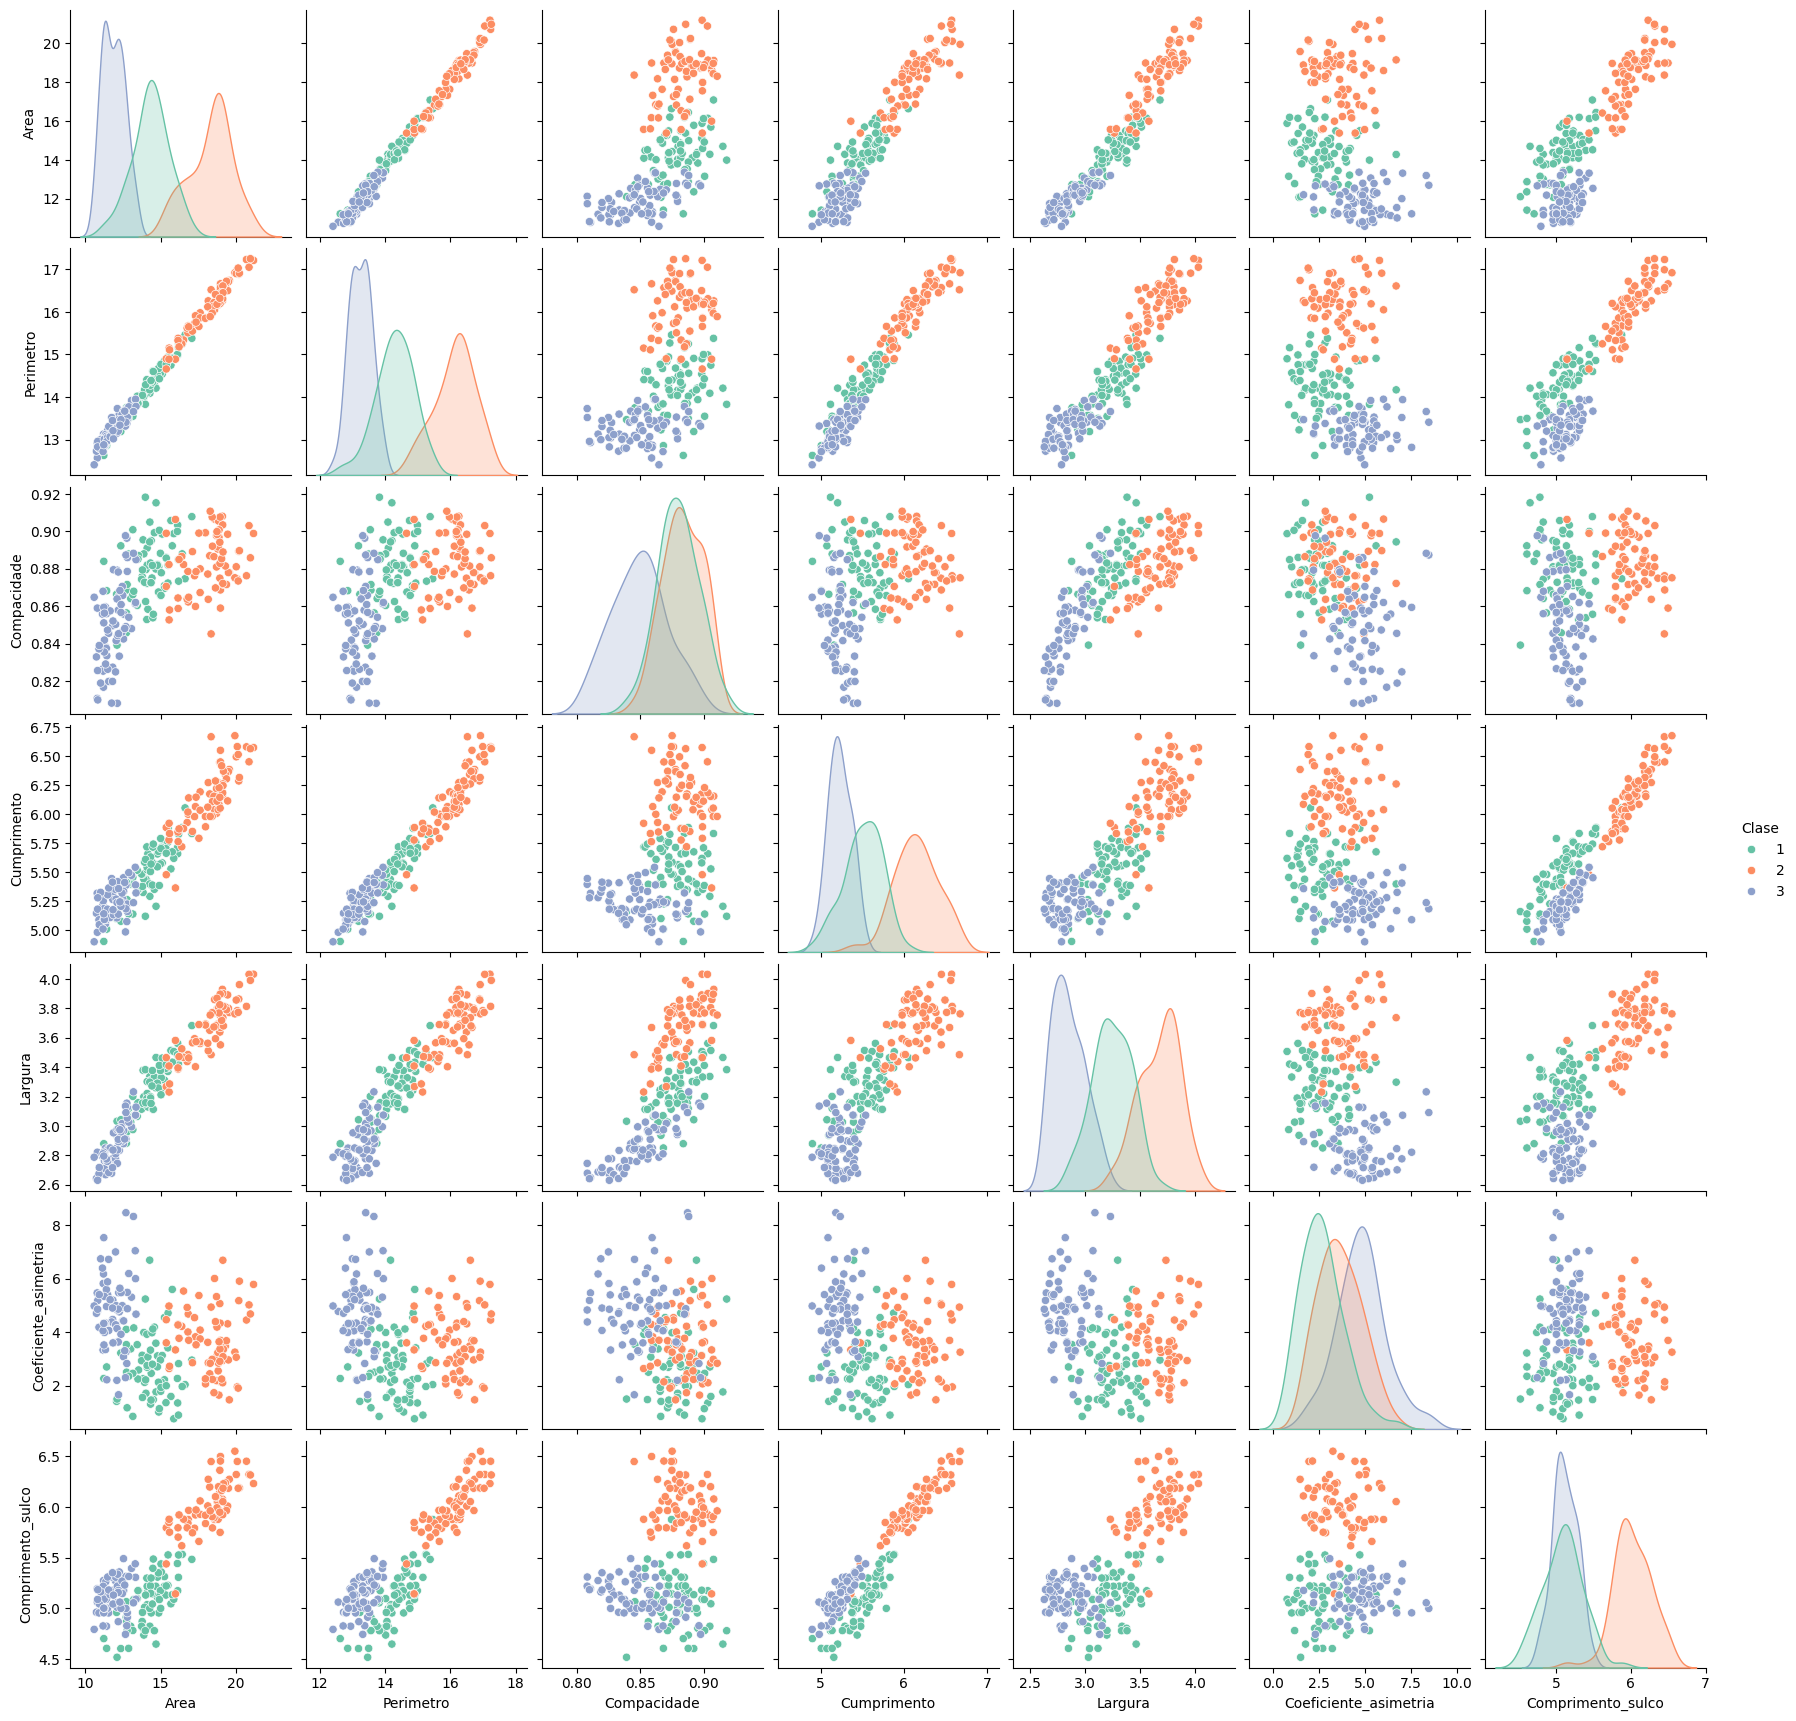

In [8]:
# Gráficos de Dispersão (Correlação)
sns.pairplot(data, hue="Clase", palette="Set2")
plt.show()

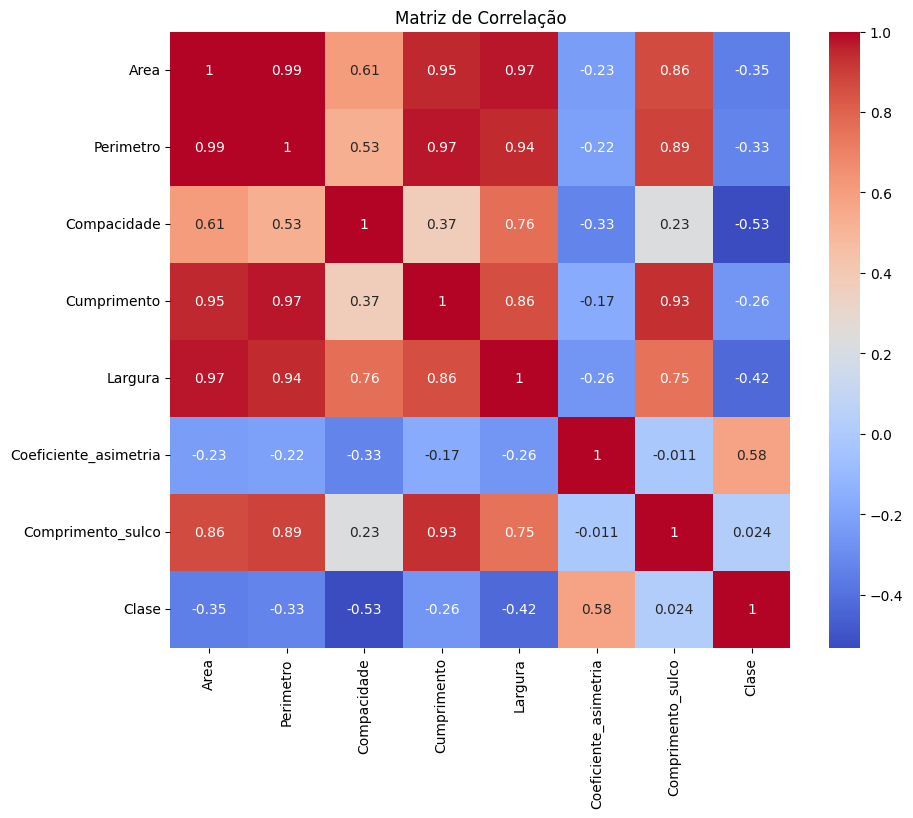

In [9]:
# Matriz de correlação
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [11]:
# Identificação e Tratamento de Valores Ausentes

# Verificar valores ausentes
print("Valores ausentes:\n", data.isnull().sum())

# Tratar valores ausentes (se houver)
data = data.dropna()

Valores ausentes:
 Area                     0
Perimetro                0
Compacidade              0
Cumprimento              0
Largura                  0
Coeficiente_asimetria    0
Comprimento_sulco        0
Clase                    0
dtype: int64


In [13]:
#Escalonamento das Características
from sklearn.preprocessing import StandardScaler

# Escalonar para melhorar a modelagem
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])  # Excluindo a coluna "Classe"
scaled_df = pd.DataFrame(scaled_data, columns=column_names[:-1])
scaled_df["Clase"] = data["Clase"]

print(scaled_df.head())

       Area  Perimetro  Compacidade  Cumprimento   Largura  \
0  0.142098   0.215462     0.000061     0.304218  0.141702   
1  0.011188   0.008224     0.428515    -0.168625  0.197432   
2 -0.192067  -0.360201     1.442383    -0.763637  0.208048   
3 -0.347091  -0.475333     1.039381    -0.688978  0.319508   
4  0.445257   0.330595     1.374509     0.066666  0.805159   

   Coeficiente_asimetria  Comprimento_sulco  Clase  
0              -0.986152          -0.383577      1  
1              -1.788166          -0.922013      1  
2              -0.667479          -1.189192      1  
3              -0.960818          -1.229983      1  
4              -1.563495          -0.475356      1  


In [14]:
# Respostas 2

# Separação dos Dados
#------------------------------------
from sklearn.model_selection import train_test_split

# Separar os dados em atributos e rótulos
X = scaled_df.iloc[:, :-1]  # Atributos escalonados
y = scaled_df["Clase"]  # Rótulos (classes)

# Divisão em conjunto de treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treinamento: 147
Tamanho do conjunto de teste: 63



Modelo: KNN
Acurácia: 87.30 %
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63


Modelo: SVM
Acurácia: 87.30 %
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63


Modelo: Random Forest
Acurácia: 92.06 %
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.95   

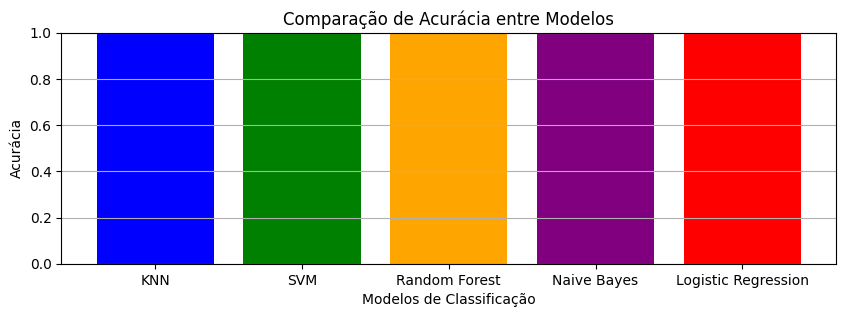

In [15]:
# Treinamento e Avaliação de Modelos
#------------------------------------
# Dicionário para armazenar os modelos
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Treinamento e avaliação dos modelos
results = {}
for name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)
    # Predição no conjunto de teste
    y_pred = model.predict(X_test)
    # Avaliar o desempenho
    accuracy = accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy
    print(f"\nModelo: {name}")
    print(f"Acurácia: {accuracy:.2f} %")
    print(classification_report(y_test, y_pred))


# Exibir os resultados de acurácia
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 3))
plt.bar(model_names, accuracies, color=["blue", "green", "orange", "purple", "red"])
plt.xlabel("Modelos de Classificação")
plt.ylabel("Acurácia")
plt.title("Comparação de Acurácia entre Modelos")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


In [18]:
# Configuração da Busca de Hiperparâmetros(GridSearchCV para ajustar os hiperparâmetros de cada modelo.)
#-------------------------------------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Função para realizar busca em grade e treinar os melhores modelos
def optimize_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# K-Nearest Neighbors (KNN).
#------------------------------------
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_model, knn_best_params = optimize_model(KNeighborsClassifier(), knn_param_grid, X_train, y_train)
print(f"Melhores parâmetros para KNN: {knn_best_params}")

# Support Vector Machine (SVM)
#------------------------------------
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_model, svm_best_params = optimize_model(SVC(), svm_param_grid, X_train, y_train)
print(f"Melhores parâmetros para SVM: {svm_best_params}")

# Random Forest
#------------------------------------
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model, rf_best_params = optimize_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train)
print(f"Melhores parâmetros para Random Forest: {rf_best_params}")

Melhores parâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Melhores parâmetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Melhores parâmetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}



Modelo Otimizado: KNN
Acurácia: 0.8571
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        21
           2       0.90      0.90      0.90        21
           3       0.83      0.95      0.89        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.85        63
weighted avg       0.86      0.86      0.85        63



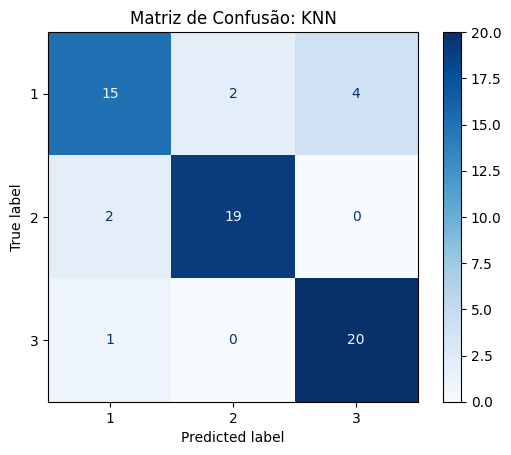


Modelo Otimizado: SVM
Acurácia: 0.8730
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.95      0.86      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



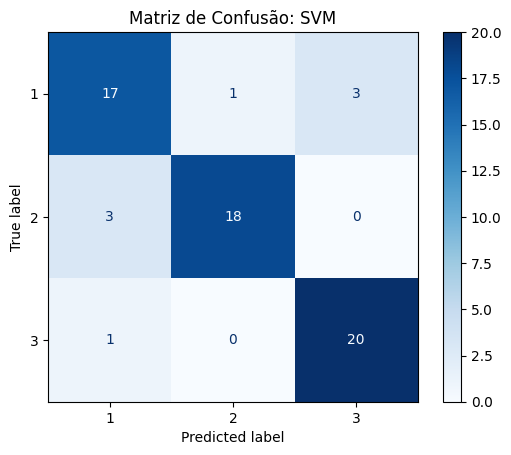


Modelo Otimizado: Random Forest
Acurácia: 0.8730
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.95      0.90      0.93        21
           3       0.83      0.95      0.89        21

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



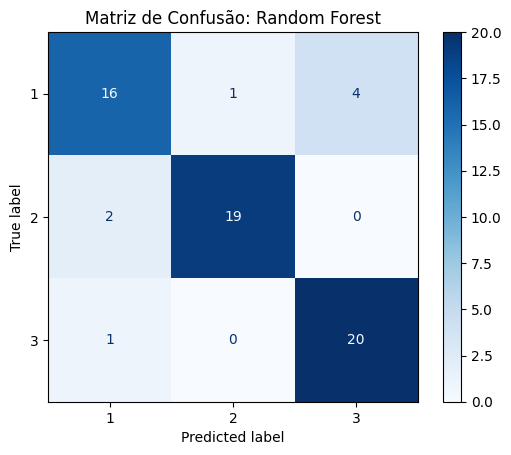

In [21]:
# Avaliação dos Modelos Otimizados
#------------------------------------
optimized_models = {
    "KNN": knn_model,
    "SVM": svm_model,
    "Random Forest": rf_model
}

for name, model in optimized_models.items():
    # Predições no conjunto de teste
    y_pred = model.predict(X_test)
    # Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModelo Otimizado: {name}")
    print(f"Acurácia: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap="Blues")
    plt.title(f"Matriz de Confusão: {name}")
    plt.show()

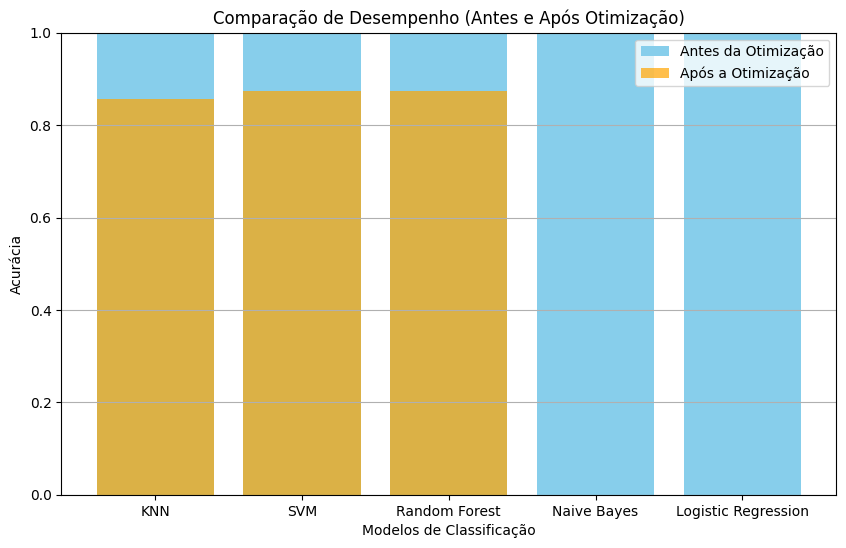

In [20]:
# Comparação Antes e Depois da Otimização
#------------------------------------
# Acurácias antes e depois da otimização
optimized_accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in optimized_models.items()}

# Comparação visual
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue', label='Antes da Otimização')
plt.bar(optimized_accuracies.keys(), optimized_accuracies.values(), color='orange', label='Após a Otimização', alpha=0.7)
plt.xlabel("Modelos de Classificação")
plt.ylabel("Acurácia")
plt.title("Comparação de Desempenho (Antes e Após Otimização)")
plt.legend()
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()

In [23]:
# Respostas 3

#Função de Otimização : Função para realizar a busca de hiperparâmetros com GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Função para realizar busca em grade e obter os melhores parâmetros
def optimize_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_


# Otimização de Modelos
#----------------------

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Parâmetros para busca
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Otimização
knn_model, knn_best_params = optimize_model(KNeighborsClassifier(), knn_param_grid, X_train, y_train)
print(f"Melhores parâmetros para KNN: {knn_best_params}")


# Support Vector Machine (SVM)
#-----------------------------
from sklearn.svm import SVC

# Parâmetros para busca
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Otimização
svm_model, svm_best_params = optimize_model(SVC(), svm_param_grid, X_train, y_train)
print(f"Melhores parâmetros para SVM: {svm_best_params}")


# Random Forest
#-----------------------------
from sklearn.ensemble import RandomForestClassifier

# Parâmetros para busca
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Otimização
rf_model, rf_best_params = optimize_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train)
print(f"Melhores parâmetros para Random Forest: {rf_best_params}")



Melhores parâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Melhores parâmetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Melhores parâmetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


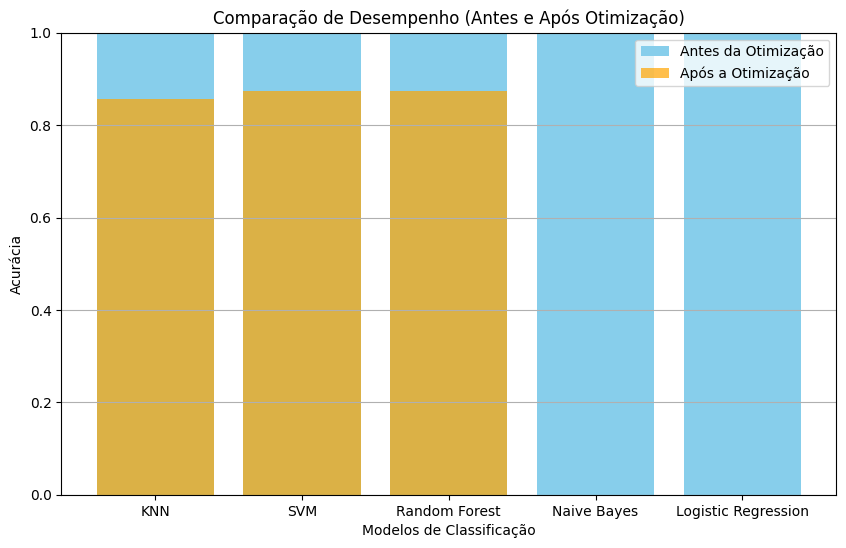

In [24]:
# Comparar acurácias antes e após otimização
optimized_accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in optimized_models.items()}

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue', label='Antes da Otimização')
plt.bar(optimized_accuracies.keys(), optimized_accuracies.values(), color='orange', alpha=0.7, label='Após a Otimização')
plt.xlabel("Modelos de Classificação")
plt.ylabel("Acurácia")
plt.title("Comparação de Desempenho (Antes e Após Otimização)")
plt.legend()
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


Melhoria no Desempenho dos Modelos:

1. Melhoria no Desempenho dos Modelos:
* Os modelos ajustados deverão apresentar melhores resultados em termos de acurácia, que mede o quanto o modelo classifica corretamente os dados de teste.
* Também veremos melhorias em outras métricas, como:
  Precisão: Indica a proporção de previsões corretas para cada classe. Quanto maior, melhor.
  Recall: Mede a capacidade do modelo de identificar corretamente todas as amostras de uma classe.
  F1-score: Combina precisão e recall para dar uma visão geral do equilíbrio entre essas métricas.

2. Matrizes de Confusão Mais Claras:
Cada modelo apresentará uma matriz de confusão, que mostrará:
* Quantas vezes o modelo classificou corretamente (diagonal principal).
* Onde ele cometeu erros (fora da diagonal).
Esperamos que os erros diminuam após a otimização.

3. Identificação do Melhor Modelo:
* Comparando as métricas, será possível identificar qual modelo se saiu melhor após a otimização.
* Por exemplo, se o Random Forest teve o melhor desempenho em acurácia e F1-score, ele será a escolha recomendada.

4. Comparação Visual Antes e Depois da Otimização:

* Um gráfico de barras mostrará as diferenças entre o desempenho antes e depois da otimização para cada modelo.
* Esperamos que as barras após a otimização (representando o novo desempenho) sejam mais altas, indicando melhorias.
